# Classification

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
X, y = mnist.data, mnist.target

In [6]:
X.shape # 28 * 28 = 784

(70000, 784)

In [7]:
def plot_digit(flatten_image_data, cmap='binary', figsize=None):
    image = flatten_image_data.reshape(28, 28)
    if figsize:
        plt.figure(figsize=figsize)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')

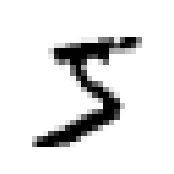

In [8]:
some_digit = X[0]
plot_digit(some_digit, figsize=(2, 2))
plt.show()

In [9]:
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

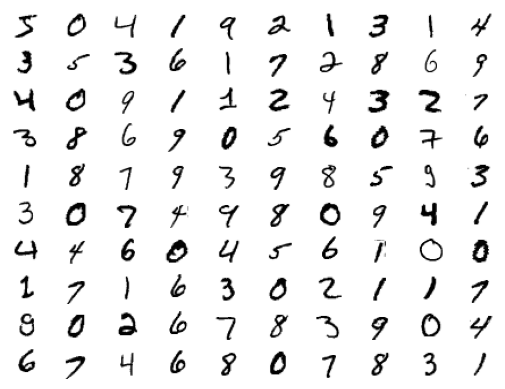

In [10]:
for i, img in enumerate(X_train[:100]):
    plt.subplot(10, 10, i+1)
    plot_digit(img)
plt.show()

In [11]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_classifier = SGDClassifier(random_state=42)


In [14]:
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
test_index = -2
sgd_classifier.predict([X_test[test_index]])

array([ True])

In [16]:
y_test[test_index]

'5'

## Performance Measures

### Measuring Accurancy Using Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. Beats Nostradamus. **This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with <span style='color: red'>skewed datasets</span>.**

### Confusion Matrices

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

In [20]:
cm

array([[53892,   687],
       [ 1891,  3530]])

**Confusion matrix**
|                   | $N_{pred}$      | $P_{pred}$     |
|-------------------| ----------------| ---------------|
|<b>$N_{actual}$</b>| 53892 (TN)      | 687 (FP)       |
|<b>$P_{actual}$</b>| 1891 (FN)       | 3530 (TP)      |

### Precision and Recall

Precision =  $\frac{TP}{TP + FP}$

Recall = $\frac{TP}{TP + FN}$

In [21]:
precision = 3530 / (3530 + 687)
recall = 3530 / (3530 + 1891)

precision, recall

(0.8370879772350012, 0.6511713705958311)

In [22]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311)

* When it claims an image represents a 5, it is correct only 83.7% of the time. More‐over, it only detects 65.1% of the 5s.

F1 Score

<span style='font-size: 20px'>$f1 = 2 * \frac{precision * recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}$<span>

In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

### Precision/Recall Trade-off

In [43]:
y_score = sgd_classifier.decision_function([X_test[test_index]])

y_score

array([9066.27363912])

In [44]:
threshold = 0
y_score > threshold

array([ True])

In [45]:
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [72]:
y_scores > threshold

array([ True, False, False, ...,  True, False, False])

In [73]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [74]:
precisions, recalls, thresholds

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905]))

In [75]:
len(precisions), len(recalls), len(thresholds)

(60001, 60001, 60000)

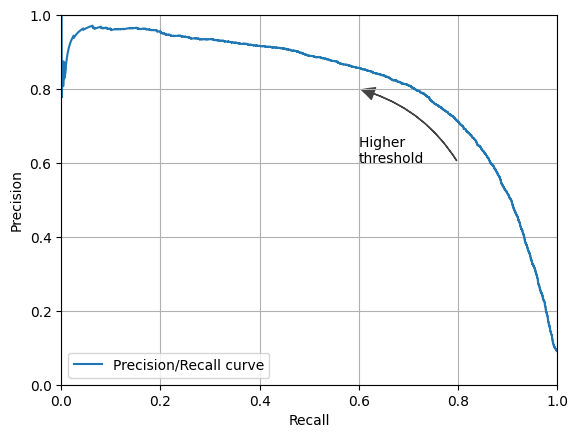

In [76]:
import matplotlib.patches as patches

plt.plot(recalls, precisions, label='Precision/Recall curve')

plt.gca().add_patch(patches.FancyArrowPatch((.8, .6), (.6, .8), 
                    connectionstyle='arc3,rad=.2',
                    arrowstyle='Simple, head_width=9, head_length=9',
                    color='#444'
                   ))
plt.text(.6, .6, 'Higher \nthreshold')
plt.grid()
plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])

plt.show()

In [77]:
index_for_90_precision = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[index_for_90_precision]
index_for_90_precision, threshold_for_90_precision

(np.int64(57109), np.float64(3370.0194991439557))

In [78]:
recalls[index_for_90_precision]

np.float64(0.4799852425751706)

### The ROC Curve

In [79]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [80]:
len(fpr), len(tpr), len(thresholds)

(3908, 3908, 3908)

In [81]:
fpr, tpr

(array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]))

**Notes**
<hr/>
Since the thresholds are sorted from low to high values, they are reversed upon returning them to ensure they correspond to both fpr and tpr, which are sorted in reversed order during their calculation.
An arbitrary threshold is added for the case tpr=0 and fpr=0 to ensure that the curve starts at (0, 0). This threshold corresponds to the np.inf.

In [82]:
thresholds

array([             inf,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

In [83]:
index_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
index_for_threshold_at_90

np.int64(520)

In [84]:
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
tpr_90, fpr_90

(np.float64(0.4799852425751706), np.float64(0.005295076861063779))

[]

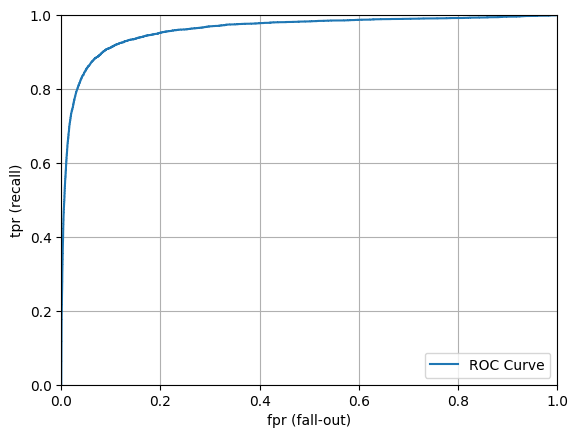

In [94]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.xlabel('fpr (fall-out)')
plt.ylabel('tpr (recall)')
plt.legend(loc='lower right')
plt.plot()

**AUC:** One way to compare classifiers is to measure the area under the curve (AUC). A
perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier
will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to estimate the
ROC AUC:

In [97]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

**NOTE**
<hr/>
Since the ROC curve is so similar to the precision/recall (PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, <b style="color: tomato">you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives. Otherwise, use the ROC curve</b>. For example,
looking at the previous ROC curve (and the ROC AUC score),
you may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement: the curve could really be closer to the
top-right corner (see Figure 3-6 again).


In [100]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [104]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [105]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

**NOTE**
<hr/>

* The model predicts that the first image is positive with 89% probability, and it
predicts that the second image is negative with 99% probability. Since each image is
either positive or negative, the probabilities in each row add up to 100%
* These are estimated probabilities, not actual probabilities. For
example, if you look at all the images that the model classified
as positive with an estimated probability between 50% and 60%,
roughly 94% of them are actually positive. So, the model’s estima‐
ted probabilities were much too low in this case—but models can
be overconfident as well. The sklearn.calibration package con‐
tains tools to calibrate the estimated probabilities and make them
much closer to actual probabilities

In [117]:
y_scores_forest = y_probas_forest[:, 1]
precision_forest, recall_forest, threshold_forest = precision_recall_curve(y_train_5, y_scores_forest)

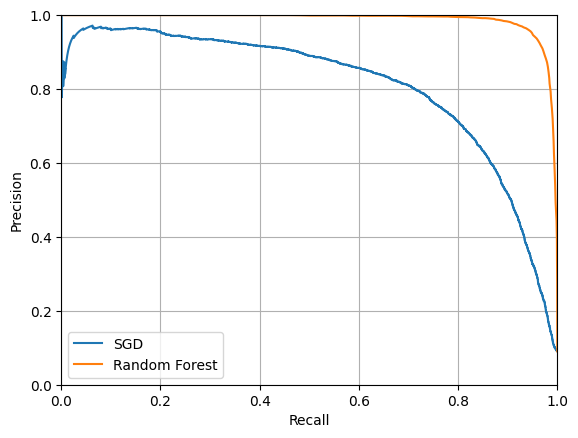

In [118]:
plt.plot(recalls, precisions, label='SGD')
plt.plot(recall_forest, precision_forest, label='Random Forest')
plt.grid()
plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
plt.show()

In [119]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5 # positive probas >= 50%
y_train_pred_forest

array([ True, False, False, ...,  True, False, False])

In [120]:
f1_score(y_train_5, y_train_pred_forest)


0.9274509803921569

In [122]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

In [124]:
precision_score(y_train_5, y_train_pred_forest), recall_score(y_train_5, y_train_pred_forest)

(0.9897468089558485, 0.8725327430363402)

* Đường cong Precision-Recall (PR Curve)
    * Định nghĩa:
        * Đường cong PR biểu diễn mối quan hệ giữa độ chính xác (precision) và độ phủ (recall) của một mô hình phân loại nhị phân tại các ngưỡng phân loại khác nhau.
        * Độ chính xác đo lường tỷ lệ các dự đoán tích cực thực sự là tích cực.
        * Độ phủ đo lường tỷ lệ các trường hợp tích cực thực tế được xác định chính xác.
    * Sử dụng:
        * Đường cong PR hữu ích khi lớp tích cực hiếm gặp (dữ liệu không cân bằng).
        * Nó tập trung vào hiệu suất của mô hình đối với lớp tích cực.
        * Được dùng khi mà chi phí của lỗi false positives và false negatives là khác biệt.
    * Phân tích:
        * Một đường cong PR tốt nằm gần góc trên bên phải của đồ thị.
        * Diện tích dưới đường cong PR (AUC-PR) là một thước đo hiệu suất tổng thể của mô hình.

* Đường cong ROC (Receiver Operating Characteristic Curve)
    * Định nghĩa:
        * Đường cong ROC biểu diễn mối quan hệ giữa tỷ lệ dương tính thật (TPR) và tỷ lệ dương tính giả (FPR) của một mô hình phân loại nhị phân tại các ngưỡng phân loại khác nhau.
        * TPR (độ nhạy) đo lường tỷ lệ các trường hợp tích cực thực tế được xác định chính xác.
        * FPR đo lường tỷ lệ các trường hợp tiêu cực thực tế bị xác định sai là tích cực.
    * Sử dụng:
        * Đường cong ROC hữu ích khi bạn muốn đánh giá hiệu suất tổng thể của mô hình trên cả hai lớp.
        * Nó ít nhạy cảm hơn với sự mất cân bằng lớp so với đường cong PR.
        * Được dùng khi mà chi phí của lỗi false positives và false negatives là tương đương.
    * Phân tích:
        * Một đường cong ROC tốt nằm gần góc trên bên trái của đồ thị.
        * Diện tích dưới đường cong ROC (AUC-ROC) là một thước đo hiệu suất tổng thể của mô hình. AUC-ROC là một số dương nhỏ hơn hoặc bằng 1. Giá trị này càng lớn thì mô hình càng tốt.
* Điểm khác biệt chính
    * Tập trung:
        * Đường cong PR tập trung vào hiệu suất của mô hình đối với lớp tích cực.
        * Đường cong ROC đánh giá hiệu suất của mô hình trên cả hai lớp.
    * Sự mất cân bằng lớp:
        * Đường cong PR nhạy cảm hơn với sự mất cân bằng lớp.
        * Đường cong ROC ít nhạy cảm hơn với sự mất cân bằng lớp.
    * Trường hợp sử dụng:
        * Sử dụng đường cong PR khi lớp tích cực hiếm gặp hoặc khi chi phí của lỗi false positives và false negatives khác biệt.
        * Sử dụng đường cong ROC khi bạn muốn đánh giá hiệu suất tổng thể của mô hình trên cả hai lớp hoặc khi chi phí của lỗi false positives và false negatives tương đương.
* Tóm lại, cả đường cong PR và đường cong ROC đều là những công cụ hữu ích để đánh giá hiệu suất của mô hình phân loại nhị phân. Việc lựa chọn đường cong nào phụ thuộc vào đặc điểm của dữ liệu và mục tiêu của bạn.

## Multiclass Classification